# Recurrent Neural Networks

calcular o preço das ações do google

In [1]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [4]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [5]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import GRU
from keras.layers import Dropout

In [6]:
# Part 2 - Building the RNN

def create_model(optimizer = 'adam',
                 un1 = 50, un2 = 50, un3 = 50, un4 = 50,
                 act1 = 'tanh', act2 = 'tanh', act3 = 'tanh', act4 = 'tanh',
                 drop1 = 0.2, drop2 = 0.2, drop3 = 0.2, drop4 = 0.2):
    
    # Initialising the RNN
    regressor = Sequential()

    # Adding the first LSTM layer and some Dropout regularisation
    regressor.add(GRU(units = un1, activation=act1, return_sequences = True, input_shape = (X_train.shape[1], 1)))
    regressor.add(Dropout(drop1))
    
    # Adding a second LSTM layer and some Dropout regularisation
    regressor.add(GRU(units = un2,activation=act2, return_sequences = True))
    regressor.add(Dropout(drop2))
    
    # Adding a third LSTM layer and some Dropout regularisation
    regressor.add(GRU(units = un3,activation=act3, return_sequences = True))
    regressor.add(Dropout(drop3))
    
    # Adding a fourth LSTM layer and some Dropout regularisation
    regressor.add(GRU(units = un4, activation=act1))
    regressor.add(Dropout(drop4))
    
    # Adding the output layer
    regressor.add(Dense(units = 1))

    # Compiling the RNN
    regressor.compile(optimizer = optimizer, loss = 'mean_squared_error')
    
    return regressor

In [7]:
# Import kerasclassifier to build the model and RandomizedSearchCV to tune the hyperparamters 

from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV

In [8]:
# Building model

model = KerasRegressor(build_fn=create_model, verbose=1)

# Creating samples of optimizers, units, dropouts and activations

optimizers = ['adam','rmsprop']
units = [20,50,80]
dropouts = [0.1,0.2,0.3]
activations = ['tanh','sigmoid','relu']

param_grid = {'optimizer':optimizers,
              'un1':units,'un2':units,'un3':units,'un4':units,
              'act1':activations,'act2':activations,'act3':activations,'act4':activations,
              'drop1':dropouts,'drop2':dropouts,'drop3':dropouts,'drop4':dropouts}

randomCV = RandomizedSearchCV(estimator=model, param_distributions = param_grid, cv = 3, n_iter=4,n_jobs=-1)

In [9]:
# Fitting the model using RandomizedSearchCV to in the Training set to find best params
randomCV.fit(X_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
38/38 [==============================] - 13s 104ms/step - loss: 0.0321
Epoch 2/10
38/38 [==============================] - 4s 105ms/step - loss: 0.0105
Epoch 3/10
38/38 [==============================] - 4s 103ms/step - loss: 0.0104
Epoch 4/10
38/38 [==============================] - 4s 114ms/step - loss: 0.0092
Epoch 5/10
38/38 [==============================] - 5s 137ms/step - loss: 0.0085
Epoch 6/10
38/38 [==============================] - 5s 129ms/step - loss: 0.0070
Epoch 7/10
38/38 [==============================] - 4s 102ms/step - loss: 0.0069
Epoch 8/10
38/38 [==============================] - 4s 99ms/step - loss: 0.0069
Epoch 9/10
38/38 [==============================] - 4s 104ms/step - loss: 0.0051
Epoch 10/10
38/38 [==============================] - 4s 113ms/step - loss: 0.0057


RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x00000199E04BF1D0>,
                   n_iter=4, n_jobs=-1,
                   param_distributions={'act1': ['tanh', 'sigmoid', 'relu'],
                                        'act2': ['tanh', 'sigmoid', 'relu'],
                                        'act3': ['tanh', 'sigmoid', 'relu'],
                                        'act4': ['tanh', 'sigmoid', 'relu'],
                                        'drop1': [0.1, 0.2, 0.3],
                                        'drop2': [0.1, 0.2, 0.3],
                                        'drop3': [0.1, 0.2, 0.3],
                                        'drop4': [0.1, 0.2, 0.3],
                                        'optimizer': ['adam', 'rmsprop'],
                                        'un1': [20, 50, 80],
                                        'un2': [20, 50, 80],
                                        'un3': [20, 50, 80],
  

In [10]:
randomCV.best_score_

-0.008888628295001885

In [11]:
randomCV.best_params_

{'un4': 80,
 'un3': 20,
 'un2': 80,
 'un1': 80,
 'optimizer': 'rmsprop',
 'drop4': 0.3,
 'drop3': 0.2,
 'drop2': 0.1,
 'drop1': 0.1,
 'act4': 'relu',
 'act3': 'tanh',
 'act2': 'tanh',
 'act1': 'tanh'}

In [12]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = randomCV.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price.reshape(-1,1))

1/1 [==============================] - 1s 1s/step


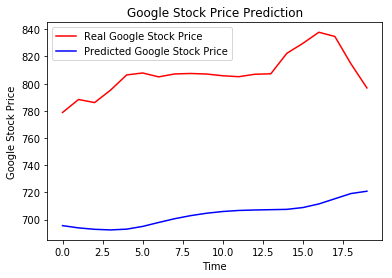

In [13]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

## FIM